 **topic** : `Survey the dynamic sampling techniques described in references [28,73] of Bottou et al (section 5.2.1). Implement and test at least one of them (including the basic one described in section 5.2.1).` 

## Question : 

What is a convergence test ? And How do I choose it ? 
Does the sample is choose randomly ? 
In step 5 do I have to choose with or without replacement ? Randomly or not randomly ? 

Notations : 

**Objective / Loss function :**

prediction function:
$$ f(w;x) = w^Tx $$ $ w \in R^d$ , $ x \in R^{N x d}$

response variable
$$ y $$ 

Loss fonction (least squared error) : 
$$ l(f(w;x_{i}),y_{i}) = (f(w;x_{i}) - y_{i})^2$$ $ i \in $\{ 1; N }$ $

Objective function :
$$J(w)=\frac{1}{N}\sum_{i=1}^{N} l(f(w;x_{i}),y_{i})$$

$$J_{S_{k}}(w_{k})=\frac{1}{\mid S \mid}\sum_{i\in S} l(f(w;x_{i}),y_{i})$$

Gradient objective function :
$$\nabla J(w)=\frac{1}{N}\sum_{i=1}^{N} \nabla l(f(w;x_{i}),y_{i})$$

$$\nabla J_{S_{k}}(w_{k})=\frac{1}{\mid S \mid}\sum_{i\in S} \nabla l(f(w;x_{i}),y_{i})$$

**Sample variance** (3.6)

$$ l(w;i) = l(f(w;x_{i}),y_{i})$$

$$ Var_{i \in S}(\nabla l(w;i)) = \frac{1}{\mid S\mid - 1}\sum_{i\in S}(\nabla l(w;i) - \nabla J_{S}(w))^2$$

**Condition** (3.9)

$$\frac{\parallel Var_{i \in S}(\nabla l(w;i)) \parallel_{1}}{\mid S \mid}  \leq \theta^2 \parallel \nabla J_{S}(w)\parallel^2_{2} $$

**formula** (3.12)

$$ \mid S_{hat} \mid = \frac{\parallel Var_{i \in S}(\nabla l(w;i)) \parallel_{1}}{\theta^2 \parallel \nabla J_{S}(w) \parallel^2_{2}}$$

**Algorithm 3.1 : Dynamic Sample Gradient Algorithm**

Choose an initial iterate $w_{0}$, an initial sample $S_{0}$, and a constant $\theta \in (0,1)$

Set $k$ $\leftarrow$ 0

**Repeat** until a convergence test is satisfied:

 1. Compute $d_{k} = -\nabla J_{S_{k}}(w_{k})$
 2. Line Search: compute steplength $\alpha_{k} > 0$ such that : 
 
 $J_{S_{k}}(w_{k} + \alpha_{k}d_{k}) < J_{S_{k}}(w_{k})$
 
 
 3. Define a new iterate: $w_{k+1} = w_{k} + \alpha_{k}d_{k}$
 4. Set $k \leftarrow K+1$
 5. Choose a sample $S_{k}$ such that $\mid S_{k}\mid = \mid S_{k-1}\mid$
 6. Compute the sample variance defined in (3.6)
 7. If condition (3.9) is not satisfied, augment $S_{k}$ using formula (3.12)

##### Library

In [7]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

##### Data For the sake of the study I'll generate  the data

In [150]:
X,y = make_regression(n_samples = 1000000, n_features = 1000)

print("Shape of X: ", X.shape)
print("Shape of y : ", y.shape)

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X:  (1000000, 1000)
Shape of y :  (1000000,)
Shape of X_train : (800000, 1000)
Shape of y_train : (800000,)
Shape of X_test : (200000, 1000)
Shape of y_test : (200000,)


##### Algorithm 3.1 : Dynamic Sample Gradient Algorithm

In [9]:
# step :
# choose : 
# - an initial iterate w0 that belong to X.shape[0]
w = np.random.rand(X.shape[1])
print("shape of w :", w.shape)

# - an initial sample S0 /
sample_size = 10
number_of_rows = X_train.shape[0]
random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)

S = X_train[random_indices,:]
ys = y_train[random_indices]


print("Shape of S :", S.shape)
print("Shape of ys :", ys.shape)
print(ys.shape)
# a constant theta that belong to (0,1)
theta = np.random.rand()

# set k <- 0 
k = 0 

shape of w : (100,)
Shape of S : (10, 100)
Shape of ys : (10,)
(10,)


1. Compute $d_{k} = -\nabla J_{S_{k}}(w_{k})$

In [10]:
# dk = -GradientJsk(wk)
def objective_gradient_(X,y,w):
    '''
     X data belong to R^n*d
     y response variable belong to R^n
     w parameter belong to R^d
    '''
    n = X.shape[0]
    
    predictions = np.dot(X,w)
    X_transpose = X.transpose()
    gradient = (2/n)*(np.dot(X_transpose,(predictions-y)))
    return gradient


 2. Line Search: compute steplength $\alpha_{k} > 0$ such that : 
 
 $J_{S_{k}}(w_{k} + \alpha_{k}d_{k}) < J_{S_{k}}(w_{k})$
 
 

In [11]:
def objective_function(X,y,w):
    '''
     X data belong to R^n*d
     y response variable belong to R^n
     w parameter belong to R^d
    '''
    n = X.shape[0]
    predictions = np.dot(X,w)
    loss = (1/n)*np.sum(np.square(predictions-y))
    return loss

In [76]:
alpha = 0.01

Js = objective_function(S,ys,w)

Jsk = objective_function(S,ys,w+alpha*dk)

dk = -objective_gradient_(S,ys,w)

while Jsk > Js:
    alpha = alpha + 0.01
    Jsk = objective_function(S,ys,w+alpha*dk)


w= w + alpha*dk



 5. Choose a sample $S_{k}$ such that $\mid S_{k}\mid = \mid S_{k-1}\mid$

In [13]:
# for now I'll asume I choose Sk with replacement 
number_of_rows = X_train.shape[0]
random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)

S = X_train[random_indices,:]
ys = y_train[random_indices]


 6. Compute the sample variance defined in (3.6)

In [14]:
def loss_gradient(X,y,w):
    predictions = np.dot(X,w)
    grad_loss = 2*(predictions - y)
    return grad_loss

def sample_variance(X,y,w):
    
    grad = loss_gradient(X,y,w)
    dk = objective_gradient_(X,y,w)
    var = []
    for i in range(len(dk)):
        var.append(np.sum(np.square(2*grad*X[:,i] - dk[i])))
    var = np.array(var)
    var = 1/(X.shape[0]-1)*var

    return var

 7. If condition (3.9) is not satisfied, augment $S_{k}$ using formula (3.12)
 
 **formula** (3.12)

$$ \mid S_{hat} \mid = \frac{\parallel Var_{i \in S}(\nabla l(w;i)) \parallel_{1}}{\theta^2 \parallel \nabla J_{S}(w) \parallel^2_{2}}$$

In [18]:
# norm 1 de sample var
var = sample_variance(S,ys,w)
A = np.sum(np.abs(var))/S.shape[0]

B = np.square(theta)*(np.sum(np.square(objective_gradient_(S,ys,w))))

A <= B

False

In [20]:
sample_size = (np.sum(np.abs(var)))/ (np.square(theta)*(np.sum(np.square(objective_gradient_(S,ys,w)))))


In [21]:
def predict_1(X_test, w1):
    n = X_test.shape[0]
    X = np.mat(X_test) # convert X into matrix to be able to use * as matrix product
    w1 = w1.reshape(-1,1)
    w1 = np.mat(w1)
    global y_pred
    y_pred = X*w1
    return y_pred

Dynamic sampling

In [152]:
# step :

# choose an initial iterate w that belong to X_train.shape[1]
w = np.random.rand(X_train.shape[1])

# Choose an initial sample S
sample_size = 10
number_of_rows = X_train.shape[0]
random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
S = X_train[random_indices,:]
ys = y_train[random_indices]

# Choose a constant theta that belong to (0,1)
theta = np.random.rand()

# Metric measure : MSE
mse_history = []
pred = predict_1(X_test,w)
mse = mean_squared_error(y_test,pred)
print(mse)
mse_history.append(mse)

# Repeat until convergence test is satisfied | convergence test mse <= 0.001
while mse >= 0.001 :

    # Compute dk  (objective function gradient J)
    dk = -objective_gradient_(S,ys,w)

    # Line Search : compute steplength alpha > 0 such that
    # J(w + alpha*dk) < j(w)
    alpha = 0.01
    Js = objective_function(S,ys,w)
    Jsk = objective_function(S,ys,w+alpha*dk)
    
    # Warning Have a look about the equality
    while Jsk < Js:
        alpha = alpha + 0.05
        Jsk = objective_function(S,ys,w+alpha*dk)
        
    # Define a new iterate w = w + alpha*dk
    w= w + alpha*dk

    # Choose a sample S of same size
    number_of_rows = X_train.shape[0]
    random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
    S = X_train[random_indices,:]
    ys = y_train[random_indices]

    #Compute the sample variance defined in (3.6)
    var = sample_variance(S,ys,w)

    # If condition (3.9) is not satisfied, augmente S using formula (3.12)
    A = np.sum(np.abs(var))/S.shape[0]
    B = np.square(theta)*(np.sum(np.square(objective_gradient_(S,ys,w))))

    if A <= B:
        sample_size = sample_size
    else :
        sample_size = int((np.sum(np.abs(var)))/ (np.square(theta)*(np.sum(np.square(objective_gradient_(S,ys,w))))))
    
    pred = predict_1(X_test,w)
    mse = mean_squared_error(y_test,pred)
    mse_history.append(mse)
    print(mse)

11314.621500685736
11343.511334720426
27545.0944558332
29420.669579740934
22575.078791207925
16138.091873536028
14395.682468383045
12037.16695081017
10210.446526294343
8274.85493386297
7304.08534977172
5857.572819383502
5234.840201861643
4289.764905131748
3595.853888254526
3241.1743095271327
2533.8442717838952
2048.1061516165087
1875.8119861990235
1609.086188684677
1354.4960427861658
1157.394130439758
885.6654231484873
788.4110676152733
708.1808776394236
605.0382306706261
533.7103167244591
455.82846062945947
392.1242118611209
325.82251309995166
264.3423242009393
237.76679193615578
197.13979764192445
165.58543227988136
145.8113758546279
125.51622108442486
104.01369221261508
87.51209838742626
73.6041734982966
58.99621229833901
47.72534959235277
40.60034520476741
32.24275605038875
26.4760164596112
21.347756704071696
17.93094898301602
15.071442256842353
13.334800501750182
11.694318650006396
9.881439757466632
8.61163209576384
6.455006611596942
5.753349174517675
4.612507226601171
3.730175220

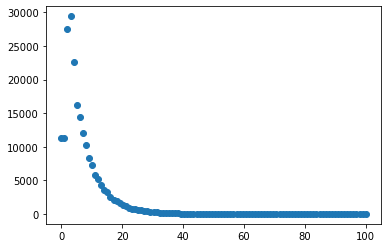

In [153]:
import matplotlib.pyplot as plt
xplot = np.linspace(start = 0, stop = len(mse_history),num = len(mse_history))
plt.scatter(xplot, mse_history)

In [123]:
#FULL-BATCH GRADIENT DESCENT

#Step : 

# choose an initial iterate w that belong to X_train.shape[1]
w = np.random.rand(X_train.shape[1])

# Metric measure : MSE
mse_history = []
pred = predict_1(X_test,w)
mse = mean_squared_error(y_test,pred)
mse_history.append(mse)
print(mse)
alpha = 0.01
dk = objective_gradient_(X_train,y_train,w)


for i in range(1000):
        # Gradient descent 
        w = w - alpha*dk
        pred = predict_1(X_test,w)
        mse = mean_squared_error(y_test,pred)
        print(mse)
        mse_history.append(mse)


    
        
    

49401.511355649156
47443.82265873912
45525.80717790329
43647.46491314166
41808.79586445425
40009.80003184104
38250.47741530204
36530.828014837265
34850.85183044669
33210.54886213033
31609.919109888164
30048.962573720208
28527.67925362647
27046.069149606938
25604.13226166161
24201.8685897905
22839.278133993597
21516.360894270903
20233.116870622413
18989.54606304813
17785.64847154806
16621.424096122195
15496.87293677054
14411.994993493097
13366.790266289861
12361.258755160834
11395.40046010602
10469.21538112541
9582.703518219007
8735.864871386817
7928.699440628834
7161.207225945061
6433.388227335494
5745.242444800138
5096.769878338991
4487.970527952054
3918.8443936393237
3389.3914754008033
2899.6117732364905
2449.505287146387
2039.0720171304924
1668.3119631888064
1337.2251253213292
1045.8115035280603
794.0710978090008
582.0039081641498
409.60993459350766
276.88917709707397
183.8416356748491
130.46731032683297
116.76620105302563
142.73830785342693
208.38363072803705
313.7021696768558
458.

3128980.5153300758
3144756.754218338
3160572.666322673
3176428.251643083
3192323.5101795667
3208258.441932125
3224233.046900758
3240247.325085465
3256301.2764862464
3272394.9011031
3288528.1989360303
3304701.1699850336
3320913.8142501116
3337166.131731263
3353458.122428489
3369789.7863417896


KeyboardInterrupt: 

In [64]:
for i in range(1,3):
    print(i)

1
2


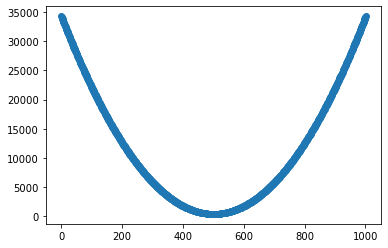

In [34]:
import matplotlib.pyplot as plt
xplot = np.linspace(start = 0, stop = len(mse_history),num = len(mse_history))
plt.scatter(xplot, mse_history)

In [154]:
# STOCHASTIC GRADIENT DESCENT

# step :

# choose an initial iterate w that belong to X_train.shape[1]
w = np.random.rand(X_train.shape[1])

mse_history = []

# for k = 1,2,... do:
for i in range(500):
    
    # Generate a random sample 
    number_of_rows = X_train.shape[0]
    sample_size = 30
    random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
    S = X_train[random_indices,:]
    ys = y_train[random_indices]
    
    # Compute a stochastic vector sv
    sv = objective_gradient_(S,ys,w)
    
    # Choose a stepsize alpha > 0 
    alpha = 0.01
    
    #Set the new iterate as w = w - alpha * sv
    w = w - alpha*sv
    
    # Compute the evaluation metrics
    pred = predict_1(X_test,w)
    mse = mean_squared_error(y_test,pred)
    print(mse)
    mse_history.append(mse)

11142.20313113116
10832.579233455794
10541.946425097616
10217.762615848986
9908.770303529836
9677.882283302491
9379.760816397258
9087.726834910362
8784.958281604508
8501.051691977827
8286.028940377224
8089.754842630559
7929.014045903151
7706.403016076728
7504.978476717799
7394.626038378185
7173.017911586335
6939.275277310201
6804.1801406337545
6603.487205349071
6478.210459417625
6370.473253616439
6166.569645736587
5999.870727398634
5871.508519542011
5716.143485261198
5460.2943145880035
5298.319516277855
5107.031239282036
4938.848731819292
4764.923937279277
4624.076683943207
4476.523998132364
4349.045849722474
4250.153427861215
4148.27682142739
4040.9021969281125
3971.525557697981
3841.5642132667035
3747.220813561055
3645.7473159473557
3546.1752351388527
3462.5511747128094
3416.3301641305898
3352.7682342636504
3263.8635177205356
3148.2532844777884
3069.9966381992135
2961.73399173603
2893.2110303571917
2788.34500754018
2730.351766642057
2681.680776154013
2619.071874079335
2567.8469370800

0.08859942641890597
0.08567934338653665
0.08322982013736892
0.08174396778145901
0.07897181247156813
0.07697664912833511
0.07581743396954978
0.0738935194974865
0.07232595431539603
0.06963928191274879
0.06836312712584187
0.06657013527743089
0.06483727559345441
0.0634691159916995
0.061957193475124184
0.06066298602697628
0.059103876305343236
0.05792722275989411
0.05567308975505881
0.053204201657011396
0.05192165676987623
0.050969693851094955
0.05001196168215491
0.04810104641473186
0.04727391851736253
0.04535024031950889
0.04442066432674703
0.04330966122310574
0.041670642227134964
0.040634768019803355
0.039405366837146155
0.03822384505707523
0.03713122955145028
0.03636598067365707
0.03540297244552296
0.03468874164259296
0.03354186563606036
0.032685498427256716
0.03186452753992442
0.031366017336824696
0.030290272957872393
0.029484427521941258
0.02865563410573616
0.027720917067412174
0.027014913250673286
0.0265506462661689
0.025650261996005293
0.02471649220276872
0.02418936741496371
0.0233533

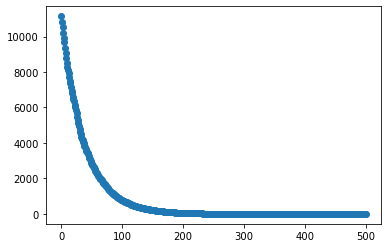

In [155]:
import matplotlib.pyplot as plt
xplot = np.linspace(start = 0, stop = len(mse_history),num = len(mse_history))
plt.scatter(xplot, mse_history)

Agorithm from Bottou et al Dynamic Sampling 

$$ w_{k+1} \leftarrow - \alpha g(w_{k},\xi_{k})  (5.6)$$

$$ g(w_{k}, \xi_{k}) := \frac{1}{n_{k}} \sum_{i \in S_{k}} \nabla f(w_{k}; \xi_{k,i}) $$ 

with 

$$ n_{k} := \mid S_{k} \mid = [ \tau^{k-1} ]  (5.7) $$ 



Algorithm : 

 1. Select randomly a sample size = 1
 2. Test $ \varphi_{k} \leq \chi \parallel g(w_{k}, \xi_{k} ) \parallel^2_{2} $
 
$$ \varphi_{k} := \frac{trace(Cov(\{ \nabla f(w_{k}; \xi_{k,i})\}_{i \in S_{k}}}{n_{k}}$$

 3. If condition is not staified, then increase the sample size

In [176]:
# Dynamic Sampling

# step :

# choose an initial iterate w that belong to X_train.shape[1]
w = np.random.rand(X_train.shape[1])

mse_history = []
sample_size = 2
# for k = 1,2,... do:
for i in range(600):
    
    # Generate a random sample 
    number_of_rows = X_train.shape[0]
    random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
    S = X_train[random_indices,:]
    ys = y_train[random_indices]
    
    # Compute a stochastic vector sv
    sv = objective_gradient_(S,ys,w)
    
    squared_norm = 0*np.sum(np.square(sv))
    
    chi = np.sum(np.square(sample_variance(S,ys,w)))
    print(chi)
    if chi <= squared_norm:
        
    # Choose a stepsize alpha > 0 
        alpha = 0.01
        print(alpha)
        #Set the new iterate as w = w - alpha * sv
        w = w - alpha*sv

        # Compute the evaluation metrics
        pred = predict_1(X_test,w)
        mse = mean_squared_error(y_test,pred)
        print(mse)
        mse_history.append(mse)
    else :
        sample_size = sample_size + 1
        print(sample_size)

667306930578661.8
3
103301745593610.8
4
34391653575359.83
5
12665753763520.945
6
98116326842837.88
7
17038122307681.93
8
158311302198178.5
9
54408634083807.695
10
45102953776391.54
11
3919480892529.843
12
86813597937213.78
13
15769104761508.855
14
30939739210192.36
15
46280795332296.28
16
8991231997007.396
17
59357244045001.414
18
46265198525633.36
19
24897432483635.51
20
52011042330939.73
21
10405588230287.96
22
17046879561322.531
23
23193897507202.883
24
45935802578383.25
25
49282072299581.01
26
23736974176564.06
27
60230497272932.91
28
40167324995074.09
29
20042975175171.203
30
74693578198132.22
31
86301297002224.64
32
46651219353763.234
33
93383822916868.25
34
90667153606456.44
35
20917314248119.45
36
34594012915527.758
37
15936408931478.316
38
73777897352703.73
39
42688115763239.97
40
46621359159084.9
41
28717108694714.754
42
84943823913609.2
43
51718778976705.47
44
62063481232178.03
45
48577627809815.81
46
36500591818160.555
47
42386203577766.984
48
45467475415935.17
49
451259365

31486696557123.707
377
31982856663275.867
378
37048532808161.266
379
33098680250413.273
380
33499116861733.69
381
26546780377518.78
382
28544356979878.906
383
36303429987963.47
384
33313266527787.867
385
40814798870970.125
386
35099369615287.074
387
38242541758903.22
388
20889517272964.47
389
39258957836807.664
390
30045792706564.0
391
37906265281204.87
392
37676292596788.02
393
39229211039964.47
394
23068864815329.156
395
44633964418099.3
396
27801027842814.387
397
34507007785128.805
398
32878231935821.08
399
32575510009987.53
400
38607001085571.2
401
45448907009528.55
402
28736679483917.266
403
41042567684682.78
404
41792409417591.766
405
32440575825151.86
406
38646394314328.64
407
31233181021897.812
408
32936956857895.1
409
27945839603798.875
410
25171987587287.84
411
36639435873499.72
412
29028929020349.54
413
31431089065688.06
414
35744121659285.27
415
39282142485428.91
416
29431714046217.305
417
39367486110251.72
418
31227097962963.902
419
36384241983906.83
420
40746957185779.945

In [167]:
mse_history

[]

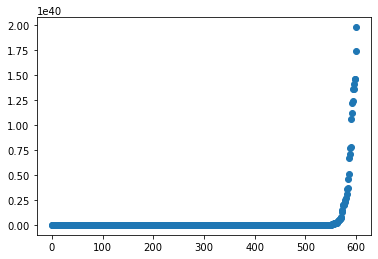

In [157]:
import matplotlib.pyplot as plt
xplot = np.linspace(start = 0, stop = len(mse_history),num = len(mse_history))
plt.scatter(xplot, mse_history)

In [80]:
print(dk[0])

print(np.square(dk[0]))
print(dk[0]**2)

3400.4835760574233
11563288.551036282
11563288.551036282


dynamic sampling : action of changing the size of the sample during  the training 